# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Exercise 11.3

In the third exercise we consider the function $ f(x, y) = \sin ( x^2 + y^2)$ for $x \in [-\frac{3}{2},\frac{3}{2}]$ and $y \in [-\frac{3}{2},\frac{3}{2}]$.

We consider $10000$ training data, $1000$ validation data and set the $\sigma = 0.4$.
To solve the exercise we rely on the model that performed best in the previous exercise adding some additional layer.

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from mpl_toolkits.mplot3d import Axes3D

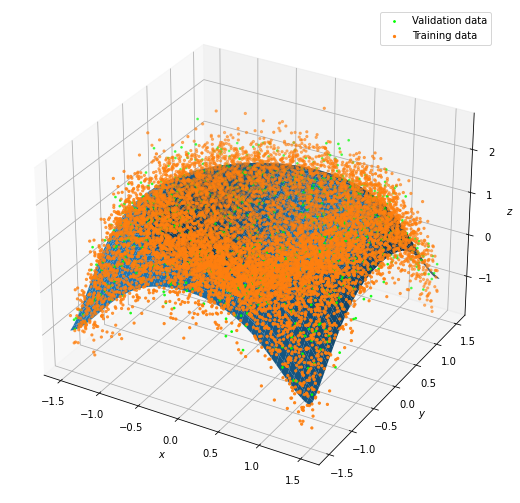

In [152]:
def f(x,y):
    return np.sin(x**2+y**2)

ntrain=10000
nvalid=1000

# generate training inputs
np.random.seed(0)
xy_train=np.zeros((ntrain,2))
xy_train[:,0] = np.random.uniform(-1.5, 1.5, ntrain)
xy_train[:,1] = np.random.uniform(-1.5, 1.5, ntrain)

xy_valid=np.zeros((nvalid,2))
xy_valid[:,0] = np.random.uniform(-1.5, 1.5, nvalid)
xy_valid[:,1] = np.random.uniform(-1.5, 1.5, nvalid)

sigma = 0.4 # noise standard deviation, for the moment it is absent

z_train=np.random.normal(f(xy_train[:,0],xy_train[:,1]),sigma)
z_valid=np.random.normal(f(xy_valid[:,0],xy_valid[:,1]),sigma)

# plot training and target dataset
fig = plt.figure(figsize=(9,9))
pp = fig.add_subplot(111, projection='3d')

x_t = np.arange(-1.5, 1.5, 0.01)
y_t = np.arange(-1.5, 1.5, 0.01)
x_t, y_t = np.meshgrid(x_t, y_t)
z_t=f(x_t, y_t)
pp.plot_surface(x_t,y_t,z_t)
pp.scatter(xy_valid[:,0],xy_valid[:,1],z_valid, s=3, color = "lime", label="Validation data")
pp.scatter(xy_train[:,0],xy_train[:,1],z_train, s= 5, color = 'C1', label="Training data")
pp.set_xlabel(r"$x$")
pp.set_ylabel(r"$y$")
pp.set_zlabel(r"$z$")
pp.legend()
plt.show()

In [153]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(4, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(4, activation="tanh"))
model.add(Dense(1))

tf.keras.optimizers.SGD(
    learning_rate=0.08, momentum=0.8, nesterov=False, name="SGD")
# compile the model 
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])


model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_303 (Dense)            (None, 4)                 12        
_________________________________________________________________
dense_304 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_305 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_306 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_307 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_308 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_309 (Dense)            (None, 32)              

In [154]:
history= model.fit(xy_valid, z_valid, batch_size=32, epochs=100, 
                   validation_data=(xy_valid, z_valid))

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.3364 - mse: 0.3364 - val_loss: 0.3067 - val_mse: 0.3067
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3105 - mse: 0.3105 - val_loss: 0.3099 - val_mse: 0.3099
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3073 - mse: 0.3073 - val_loss: 0.3187 - val_mse: 0.3187
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3065 - mse: 0.3065 - val_loss: 0.3023 - val_mse: 0.3023
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3043 - mse: 0.3043 - val_loss: 0.3017 - val_mse: 0.3017
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3043 - mse: 0.3043 - val_loss: 0.3029 - val_mse: 0.3029
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3026 - mse: 0.3026 - val_loss: 0.3096 - val_mse: 0.3096
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3034 - m

In [155]:
score = model.evaluate(xy_valid, z_valid, batch_size=32)

32/32 [==============================] - 0s 858us/step - loss: 0.2556 - mse: 0.2556


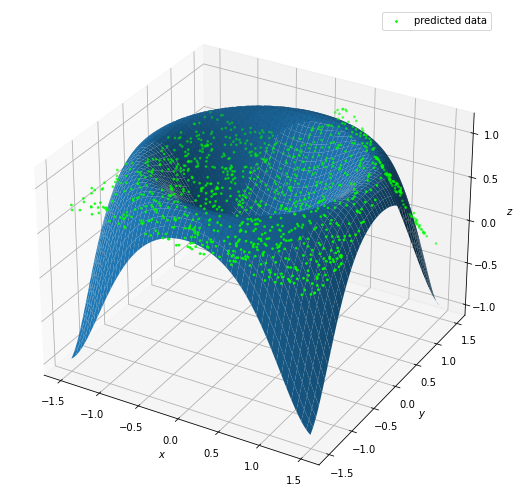


 Model performance:
– Test loss: 0.255585253238678
– Test accuracy: 0.255585253238678 



In [157]:
xy_predicted=np.zeros((nvalid,2))
xy_predicted[:,0]=np.random.uniform(-1.5, 1.5, nvalid) 
xy_predicted[:,1]=np.random.uniform(-1.5, 1.5, nvalid)

z_predicted = model.predict(xy_predicted)

fig = plt.figure(figsize=(9,9))
pp = fig.add_subplot(111, projection='3d')

x_t = np.arange(-1.5, 1.5, 0.01)
y_t = np.arange(-1.5, 1.5, 0.01)
x_t, y_t = np.meshgrid(x_t, y_t)
z_t=f(x_t, y_t)


pp.plot_surface(x_t,y_t,z_t)
pp.scatter(xy_predicted[:,0],xy_predicted[:,1],z_predicted, s=3, color = "lime", label="predicted data")
pp.set_xlabel(r"$x$")
pp.set_ylabel(r"$y$")
pp.set_zlabel(r"$z$")
pp.legend()
plt.show()

print('\n', 'Model performance:')
print('– Test loss:', score[0])
print('– Test accuracy:', score[1],'\n')

As we can see our model does not perfectly fit the function. Let's try to change the optimizer.

In [176]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(4, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(4, activation="tanh"))
model.add(Dense(1))

# compile the model 
model.compile(optimizer='adamax', loss='mse', metrics=['mse'])


model.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_371 (Dense)            (None, 4)                 12        
_________________________________________________________________
dense_372 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_373 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_374 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_375 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_376 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_377 (Dense)            (None, 32)              

In [177]:
history= model.fit(xy_valid, z_valid, batch_size=32, epochs=100, 
                   validation_data=(xy_valid, z_valid))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.3938 - mse: 0.3938 - val_loss: 0.3110 - val_mse: 0.3110
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3104 - mse: 0.3104 - val_loss: 0.3059 - val_mse: 0.3059
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3067 - mse: 0.3067 - val_loss: 0.3057 - val_mse: 0.3057
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3072 - mse: 0.3072 - val_loss: 0.3044 - val_mse: 0.3044
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3061 - mse: 0.3061 - val_loss: 0.3039 - val_mse: 0.3039
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3053 - mse: 0.3053 - val_loss: 0.3036 - val_mse: 0.3036
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3056 - mse: 0.3056 - val_loss: 0.3040 - val_mse: 0.3040
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3042 - m

Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2829 - mse: 0.2829 - val_loss: 0.2824 - val_mse: 0.2824
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2820 - mse: 0.2820 - val_loss: 0.2807 - val_mse: 0.2807
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2819 - mse: 0.2819 - val_loss: 0.2788 - val_mse: 0.2788
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2796 - mse: 0.2796 - val_loss: 0.2793 - val_mse: 0.2793
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2795 - mse: 0.2795 - val_loss: 0.2767 - val_mse: 0.2767
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2793 - mse: 0.2793 - val_loss: 0.2762 - val_mse: 0.2762
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2767 - mse: 0.2767 - val_loss: 0.2749 - val_mse: 0.2749
Epoch 70/100
32/32 [==============================] - 0s 1ms/step - loss: 0.

In [178]:
score = model.evaluate(xy_valid, z_valid, batch_size=32)

32/32 [==============================] - 0s 767us/step - loss: 0.2226 - mse: 0.2226


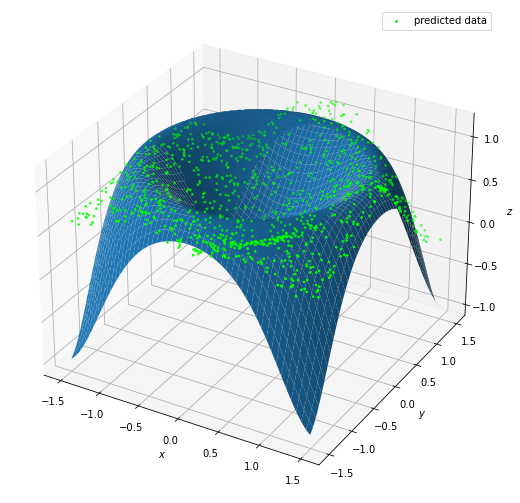


 Model performance:
– Test loss: 0.22259913384914398
– Test accuracy: 0.22259913384914398 



In [180]:
xy_predicted=np.zeros((nvalid,2))
xy_predicted[:,0]=np.random.uniform(-1.5, 1.5, nvalid) 
xy_predicted[:,1]=np.random.uniform(-1.5, 1.5, nvalid)

z_predicted = model.predict(xy_predicted)

fig = plt.figure(figsize=(9,9))
pp = fig.add_subplot(111, projection='3d')

x_t = np.arange(-1.5, 1.5, 0.01)
y_t = np.arange(-1.5, 1.5, 0.01)
x_t, y_t = np.meshgrid(x_t, y_t)
z_t=f(x_t, y_t)


pp.plot_surface(x_t,y_t,z_t)
pp.scatter(xy_predicted[:,0],xy_predicted[:,1],z_predicted, s=3, color = "lime", label="predicted data")
pp.set_xlabel(r"$x$")
pp.set_ylabel(r"$y$")
pp.set_zlabel(r"$z$")
pp.legend()
plt.show()

print('\n', 'Model performance:')
print('– Test loss:', score[0])
print('– Test accuracy:', score[1],'\n')

Changing the optimizer we see a slight improvement in performance.

The last attempt is to change the activation function.

In [181]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(4, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(16, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(4, activation="tanh"))
model.add(Dense(1))

# compile the model 
model.compile(optimizer='adamax', loss='mse', metrics=['mse'])


model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_382 (Dense)            (None, 4)                 12        
_________________________________________________________________
dense_383 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_384 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_385 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_386 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_387 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_388 (Dense)            (None, 32)              

In [182]:
history= model.fit(xy_valid, z_valid, batch_size=32, epochs=100, 
                   validation_data=(xy_valid, z_valid))

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.3666 - mse: 0.3666 - val_loss: 0.2997 - val_mse: 0.2997
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2957 - mse: 0.2957 - val_loss: 0.2883 - val_mse: 0.2883
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2862 - mse: 0.2862 - val_loss: 0.2814 - val_mse: 0.2814
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2799 - mse: 0.2799 - val_loss: 0.2769 - val_mse: 0.2769
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2762 - mse: 0.2762 - val_loss: 0.2732 - val_mse: 0.2732
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2728 - mse: 0.2728 - val_loss: 0.2705 - val_mse: 0.2705
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2698 - mse: 0.2698 - val_loss: 0.2674 - val_mse: 0.2674
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2671 - m

In [183]:
score = model.evaluate(xy_valid, z_valid, batch_size=32)

32/32 [==============================] - 0s 703us/step - loss: 0.1719 - mse: 0.1719


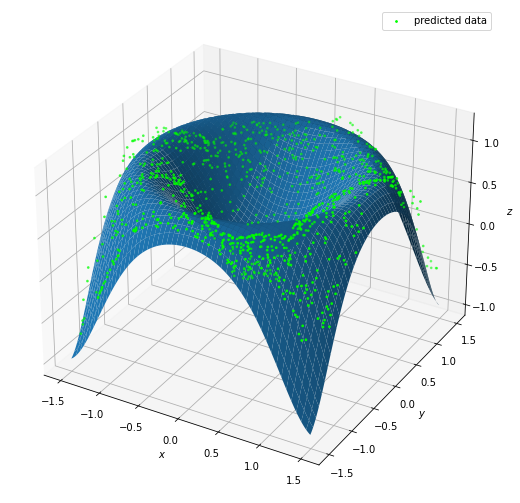


 Model performance:
– Test loss: 0.1718704253435135
– Test accuracy: 0.1718704253435135 



In [185]:
xy_predicted=np.zeros((nvalid,2))
xy_predicted[:,0]=np.random.uniform(-1.5, 1.5, nvalid) 
xy_predicted[:,1]=np.random.uniform(-1.5, 1.5, nvalid)

z_predicted = model.predict(xy_predicted)

fig = plt.figure(figsize=(9,9))
pp = fig.add_subplot(111, projection='3d')

x_t = np.arange(-1.5, 1.5, 0.01)
y_t = np.arange(-1.5, 1.5, 0.01)
x_t, y_t = np.meshgrid(x_t, y_t)
z_t=f(x_t, y_t)


pp.plot_surface(x_t,y_t,z_t)
pp.scatter(xy_predicted[:,0],xy_predicted[:,1],z_predicted, s=3, color = "lime", label="predicted data")
pp.set_xlabel(r"$x$")
pp.set_ylabel(r"$y$")
pp.set_zlabel(r"$z$")
pp.legend()
plt.show()

print('\n', 'Model performance:')
print('– Test loss:', score[0])
print('– Test accuracy:', score[1],'\n')

As we can also observe from the value of the loss, which approaches the value of the variance $ \sigma^2 $, with this last attempt we can affirm that the best efficiency is obtained with the right compromise between the depth of the network, the width of the network , correct optimizers and correct activation functions.